In [2]:
import random
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

c:\Users\14708\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
main_df = pd.read_csv(r"C:\Users\14708\Downloads\Tata and Hyundai cars - data.xlsx - Data.csv")
df = main_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1528 non-null   object 
 1   Headline              710 non-null    object 
 2   URL                   1528 non-null   object 
 3   Opening Text          710 non-null    object 
 4   Hit Sentence          1528 non-null   object 
 5   Source                1528 non-null   object 
 6   Influencer            1065 non-null   object 
 7   Country               1528 non-null   object 
 8   Subregion             321 non-null    object 
 9   Language              1528 non-null   object 
 10  Reach                 1519 non-null   float64
 11  Desktop Reach         710 non-null    float64
 12  Mobile Reach          710 non-null    float64
 13  Twitter Social Echo   710 non-null    float64
 14  Facebook Social Echo  710 non-null    float64
 15  Reddit Social Echo   

In [4]:
df.isna().sum()

Date                       0
Headline                 818
URL                        0
Opening Text             818
Hit Sentence               0
Source                     0
Influencer               463
Country                    0
Subregion               1207
Language                   0
Reach                      9
Desktop Reach            818
Mobile Reach             818
Twitter Social Echo      818
Facebook Social Echo     818
Reddit Social Echo       818
National Viewership        0
Engagement              1176
Sentiment                  0
Keywords                   0
State                    500
dtype: int64

In [5]:
print('Subregion:',df['Subregion'].isna().sum())
print('State:',df['State'].isna().sum())

Subregion: 1207
State: 500


In [6]:
''' Most of the values in Subregion are State names and with their high null value content, it is better to use Subregion 
    to fill any null values in the State column and then decompose the column'''
print('State: ',df['State'].fillna(df['Subregion']).isna().sum())
print('Subregion: ',df['Subregion'].fillna(df['State']).isna().sum())

# it will be better to remove the subregion column 
df.drop(columns='Subregion', inplace=True)

State:  497
Subregion:  497


In [7]:
# The Reach column has only 9 null values so it's better to remove those 9 rows.
df.dropna(subset='Reach', inplace=True)

In [8]:
# It also makes no sense to keep the engagement column
df.drop(columns=['Engagement'], inplace=True)

In [9]:
# Renaming the Keyword column as Parameters
df['label'] = df['Keywords']
df.drop(columns='Keywords', inplace=True)

In [10]:
''' On comparision it seems that some columns have high null values only because of the source twitter,
    So it is better to have 2 different datasets to analyze the data without any data loss'''
print('Twitter null values:')
df[df['Source']=='Twitter'].isna().sum()

Twitter null values:


Date                      0
Headline                809
URL                       0
Opening Text            809
Hit Sentence              0
Source                    0
Influencer                0
Country                   0
Language                  0
Reach                     0
Desktop Reach           809
Mobile Reach            809
Twitter Social Echo     809
Facebook Social Echo    809
Reddit Social Echo      809
National Viewership       0
Sentiment                 0
State                   126
label                     0
dtype: int64

In [11]:
print('National Viewership: ',df['National Viewership'].value_counts())
# Again makes no sense to keep national viewership, so will remove this column too
df.drop(columns='National Viewership', inplace=True)

National Viewership:  0    1519
Name: National Viewership, dtype: int64


In [12]:
print(df['Date'].min()), print(df['Date'].max())  # Seems like all the posts are in Septemeber of 2023, thus will create day and hour column

df['Date'] = pd.to_datetime(df['Date']) 
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour

12-Sep-2023 01:04PM
28-Sep-2023 12:49PM


In [13]:
df['label'].unique() # Checking for unique labels
df['label']=df['label'].str.lower()  

df['label'].unique() # In order to reduce the redundance, i plan to create 3 labels - tata, hyundai, tata_hyundai

label_keywords = {
    'hyundai,cars':'hyundai', 'tata,cars':'tata', 'cars,tata':'tata', 'hyundai,cars,hyundai':'hyundai',
       'cars,hyundai':'hyundai', 'hyundai,cars,cars':'hyundai', 'cars,tata,hyundai':'hyundai',
       'cars,hyundai,tata':'tata_hyundai', 'tata,cars,tata':'tata', 'cars,cars,tata':'tata',
       'cars,hyundai,cars':'hyundai', 'cars,hyundai,cars,tata':'tata_hyundai', 'tata,cars,hyundai':'tata_hyundai',
       'tata,cars,cars':'tata', 'cars,tata,tata,hyundai':'tata_hyundai',
       'hyundai,cars,tata,cars':'tata_hyundai', 'tata,tata,cars':'tata', 'tata,cars,tata,cars':'tata',
       'hyundai,cars,tata':'tata_hyundai', 'hyundai,tata,cars':'tata_hyundai', 'cars,cars,tata,tata':'tata',
       'cars,tata,tata':'tata', 'cars,tata,hyundai,cars':'tata_hyundai', 'cars,tata,cars':'tata',
       'tata,cars,hyundai,cars':'tata_hyundai', 'tata,hyundai,cars':'tata_hyundai',
       'cars,hyundai,hyundai,cars':'hyundai', 'cars,tata,cars,hyundai':'tata_hyundai'
}

df['label'] = df['label'].map(label_keywords)
df['label'].unique()

array(['hyundai', 'tata', 'tata_hyundai'], dtype=object)

In [14]:
df # this is the absolute dataset.
twitter_df=df[df['Source']=='Twitter']
remaining_df = df[df['Source']!='Twitter']

#### Twitter Dataset (dealing with missing values)

In [15]:
# Checking and dealing with null vlaues in twitter_df
twitter_df.isna().sum()
# it is wise to remove the columns with high null values
twitter_df.drop(columns=[
    'Headline', 'Opening Text', 'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo', 'Facebook Social Echo', 'Reddit Social Echo'
                         ], inplace=True)

twitter_df.isna().sum()

C:\Users\14708\AppData\Local\Temp\ipykernel_19776\3111735953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df.drop(columns=[


Date              0
URL               0
Hit Sentence      0
Source            0
Influencer        0
Country           0
Language          0
Reach             0
Sentiment         0
State           126
label             0
day               0
hour              0
dtype: int64

In [16]:
# I aim to fill the null values in the state column as per the value count ration of the non null values
print(twitter_df['State'].value_counts())

def fill_na_based_on_ratio(df, column_name):
    value_counts = df[column_name].value_counts()
    total_counts = value_counts.sum()
    null_count = df[column_name].isnull().sum()
    ratio = value_counts / total_counts
    fill_values = ratio.index.to_list()
    fill_probabilities = ratio.to_list()

    df[column_name] = df[column_name].apply(
        lambda x: np.random.choice(fill_values, p=fill_probabilities) if pd.isnull(x) else x
    )

# Fill null values in twitter_df
for column in twitter_df.columns:
    fill_na_based_on_ratio(twitter_df, column)

C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(
C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(
C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Tamil Nadu          247
Maharashtra         110
Karnataka            64
Delhi                46
Kerala               36
                   ... 
Uttarakhand           1
Tripura               1
Goa                   1
Mizoram               1
Himachal Pradesh      1
Name: State, Length: 28, dtype: int64


C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(
C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(
C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2978578175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

#### Remaining Dataset (Dealing with missing Values)

In [17]:
remaining_df.isna().sum()

Date                      0
Headline                  0
URL                       0
Opening Text              0
Hit Sentence              0
Source                    0
Influencer              463
Country                   0
Language                  0
Reach                     0
Desktop Reach             0
Mobile Reach              0
Twitter Social Echo       0
Facebook Social Echo      0
Reddit Social Echo        0
Sentiment                 0
State                   371
label                     0
day                       0
hour                      0
dtype: int64

In [18]:
# it makes sense to remove the Influence and State column in this dataset
remaining_df.drop(columns=['Influencer', 'State'], inplace=True)

C:\Users\14708\AppData\Local\Temp\ipykernel_19776\1376430963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_df.drop(columns=['Influencer', 'State'], inplace=True)


In [19]:
remaining_df

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Sentiment,label,day,hour
0,2023-09-28 14:08:00,Kia और Hyundai ने वापस बुलाईं अपनी 35 लाख कारे...,https://hindi.pardaphash.com/kia-and-hyundai-r...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Pardaphash,India,Hindi,31307.0,1279.0,30028.0,0.0,0.0,0.0,Neutral,hyundai,28,14
1,2023-09-28 13:46:00,"Tata Punch EV spied, may compete with MG Comen...",https://economictimes.indiatimes.com/industry/...,Tata Motors is reportedly developing an electr...,... Punch EV is expected to compete with the M...,The Economic Times,India,English,15403059.0,6171732.0,9231327.0,0.0,0.0,0.0,Neutral,tata,28,13
2,2023-09-28 13:30:00,Tata Avinya Reviews On Road Price 2023 Mileage...,https://badisoch.in/automobile-news/tata-aviny...,... (adsbygoogle = window.adsbygoogle || []).p...,"... , despite most carmakers focusing on large...",Badi Soch,India,English,1128280.0,171549.0,956731.0,0.0,0.0,0.0,Neutral,tata,28,13
5,2023-09-28 12:49:00,Oldest Indian Companies and Their Current Acti...,https://www.businessoutreach.in/oldest-indian-...,"India’s rich еntrеprеnеurial history, dating b...",... on thе intеrnational stagе. Innovation and...,Business Outreach,India,English,71485.0,9301.0,62184.0,0.0,0.0,0.0,Positive,tata,28,12
6,2023-09-28 12:25:00,Maruti Suzuki Swift vs Tata Altroz: Comparing ...,https://nationalcybersecurity.com/maruti-suzuk...,"For a safety-conscious buyer, it is important ...","... to consider the safest cars, or top safety...",National Cyber Security,India,English,817.0,428.0,389.0,0.0,0.0,0.0,Positive,tata,28,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2023-09-12 06:36:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://planetcirculate.com/mg3-hatchback-take...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Planet Circulate,India,English,1142.0,1142.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6
1523,2023-09-12 06:20:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://bulletinreporter.com/mg3-hatchback-tak...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Bulletin Reporter,India,English,2074.0,2074.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6
1524,2023-09-12 05:24:00,MG3 hatchback named by RACV as the most cost-e...,https://vervetimes.com/mg3-hatchback-named-by-...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Verve times - Latest News around the World,India,English,26425.0,7491.0,18934.0,0.0,0.0,0.0,Positive,hyundai,12,5
1525,2023-09-12 04:37:00,RACV names MG3 hatchback as the cheapest vehic...,https://newsconcerns.com/racv-names-mg3-hatchb...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",News Concerns - Latest News Update,India,English,9323.0,2527.0,6796.0,0.0,0.0,0.0,Positive,hyundai,12,4


In [20]:
# twitter data file
twitter_df.to_csv('twitter_data.csv', index=False)
# Remaining data file
remaining_df.to_csv('remaining_df.csv', index=False)

In [25]:
sentiment_keywords = {'Neutral':0, 'Negative':-1, 'Positive':1}
df['sentiment_score'] = df['Sentiment'].map(sentiment_keywords)

In [26]:
def map_sentiment_score_to_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis based on 'Sentiment Score' column
df['Sentiment Analysis'] = df['sentiment_score'].apply(map_sentiment_score_to_label)

df

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Sentiment,State,label,day,hour,sentiment_score,Sentiment Analysis
0,2023-09-28 14:08:00,Kia और Hyundai ने वापस बुलाईं अपनी 35 लाख कारे...,https://hindi.pardaphash.com/kia-and-hyundai-r...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Pardaphash,NaN,India,Hindi,31307.0,1279.0,30028.0,0.0,0.0,0.0,Neutral,Delhi,hyundai,28,14,0,Neutral
1,2023-09-28 13:46:00,"Tata Punch EV spied, may compete with MG Comen...",https://economictimes.indiatimes.com/industry/...,Tata Motors is reportedly developing an electr...,... Punch EV is expected to compete with the M...,The Economic Times,NaN,India,English,15403059.0,6171732.0,9231327.0,0.0,0.0,0.0,Neutral,Maharashtra,tata,28,13,0,Neutral
2,2023-09-28 13:30:00,Tata Avinya Reviews On Road Price 2023 Mileage...,https://badisoch.in/automobile-news/tata-aviny...,... (adsbygoogle = window.adsbygoogle || []).p...,"... , despite most carmakers focusing on large...",Badi Soch,NaN,India,English,1128280.0,171549.0,956731.0,0.0,0.0,0.0,Neutral,NaN,tata,28,13,0,Neutral
3,2023-09-28 13:24:00,NaN,http://twitter.com/automobilindia8/statuses/17...,NaN,Engine Fire-Related Risks Force Kia & Hyundai ...,Twitter,@automobilindia8,India,English,2.0,NaN,NaN,NaN,NaN,NaN,Neutral,Karnataka,hyundai,28,13,0,Neutral
4,2023-09-28 13:22:00,NaN,http://twitter.com/MalakpetD/statuses/17073021...,NaN,"@srinualavilli @BMTC_BENGALURU Mahindra, Tata,...",Twitter,@MalakpetD,India,English,506.0,NaN,NaN,NaN,NaN,NaN,Neutral,Telangana,tata,28,13,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,2023-09-12 06:20:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://bulletinreporter.com/mg3-hatchback-tak...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Bulletin Reporter,Kemal Pasha,India,English,2074.0,2074.0,0.0,0.0,0.0,0.0,Positive,NaN,hyundai,12,6,1,Positive
1524,2023-09-12 05:24:00,MG3 hatchback named by RACV as the most cost-e...,https://vervetimes.com/mg3-hatchback-named-by-...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Verve times - Latest News around the World,NaN,India,English,26425.0,7491.0,18934.0,0.0,0.0,0.0,Positive,NaN,hyundai,12,5,1,Positive
1525,2023-09-12 04:37:00,RACV names MG3 hatchback as the cheapest vehic...,https://newsconcerns.com/racv-names-mg3-hatchb...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",News Concerns - Latest News Update,Charlie Brown,India,English,9323.0,2527.0,6796.0,0.0,0.0,0.0,Positive,Madhya Pradesh,hyundai,12,4,1,Positive
1526,2023-09-12 04:04:00,Tata Power EZ App Electrifies Green Revolution...,https://thenfapost.com/tata-power-ez-app-elect...,Tata Power EZ App Electrifies Green Revolution...,Charging hubs for leading cab fleet operators....,NFAPost,N V Vijayakumar,India,English,851.0,851.0,0.0,0.0,0.0,0.0,Neutral,Karnataka,tata,12,4,0,Neutral


In [27]:
hyundai_data = df[df['label'] == 'hyundai']
tata_data = df[df['label'] == 'tata']

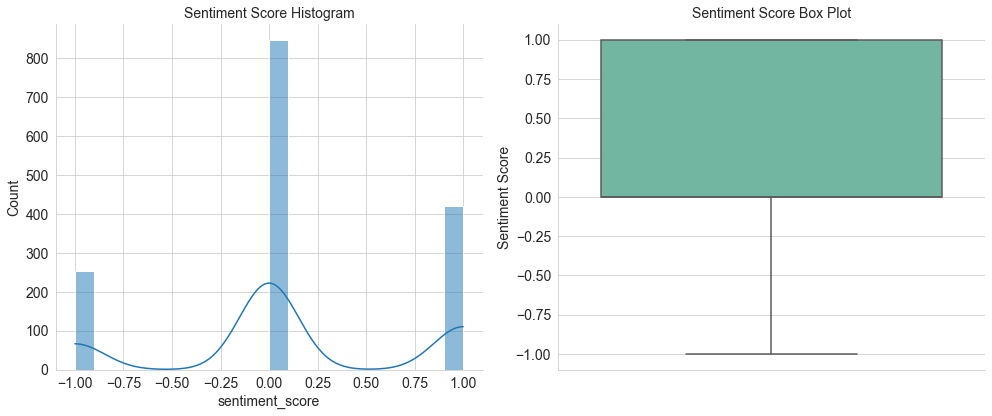

In [32]:
# Creating a figure with subplots
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='sentiment_score', bins=20, kde=True, ax=ax1, palette='viridis')
ax1.set_title('Sentiment Score Histogram', fontsize=14)

sns.boxplot(data=df, y='sentiment_score', ax=ax2, palette='Set2')
ax2.set_title('Sentiment Score Box Plot', fontsize=14)

ax2.set(ylabel='Sentiment Score')

sns.despine()

plt.tight_layout()
plt.show()

In [33]:
# Summary statistics for 'Sentiment Score' column
sentiment_score_stats = df['sentiment_score'].describe()

# Distribution of 'Sentiment Score'
sentiment_score_distribution = df['sentiment_score'].value_counts()

# Mean sentiment score
mean_sentiment_score = df['sentiment_score'].mean()

# Median sentiment score
median_sentiment_score = df['sentiment_score'].median()

print("Summary Statistics for 'Sentiment Score':")
print(sentiment_score_stats)

print("\nDistribution of 'Sentiment Score':")
print(sentiment_score_distribution)

print(f"\nMean Sentiment Score: {mean_sentiment_score}")
print(f"Median Sentiment Score: {median_sentiment_score}")

Summary Statistics for 'Sentiment Score':
count    1519.000000
mean        0.109941
std         0.656697
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sentiment_score, dtype: float64

Distribution of 'Sentiment Score':
 0    846
 1    420
-1    253
Name: sentiment_score, dtype: int64

Mean Sentiment Score: 0.10994075049374588
Median Sentiment Score: 0.0


## Consumer Perception

### Tata

In [28]:
average_sentiment_score = tata_data['sentiment_score'].mean()

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)

average_reach = tata_data['Reach'].mean()

sentiment_counts = tata_data['Sentiment Category'].value_counts()

print(f"Average Sentiment Score for Tata cars: {average_sentiment_score:.2f}")
print(f"Average Reach for Tata cars: {average_reach:.2f}")
print("\nSentiment Category Counts:")
print(sentiment_counts)

Average Sentiment Score for Tata cars: 0.10
Average Reach for Tata cars: 2179684.99

Sentiment Category Counts:
Neutral     626
Positive    227
Negative    127
Name: Sentiment Category, dtype: int64


C:\Users\14708\AppData\Local\Temp\ipykernel_19776\3429287003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)


In [29]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment = tata_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment)


         Attribute  sentiment_score         Reach
0      Accessories         0.368421  7.423338e+07
1             Cost         0.472222  2.485890e+08
2               EV        -0.019380  6.602274e+08
3  Fuel Efficiency         0.666667  1.265916e+07
4            Other         0.125796  1.132056e+09
5      Performance        -0.500000  2.706400e+04
6           Safety        -0.032258  8.298788e+06


C:\Users\14708\AppData\Local\Temp\ipykernel_19776\2669460840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)


## Hyundai

In [30]:
average_sentiment_score_hyundai = hyundai_data['sentiment_score'].mean()

def categorize_sentiment_hyundai(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)

average_reach_hyundai = hyundai_data['Reach'].mean()

sentiment_counts_hyundai = hyundai_data['Sentiment Category'].value_counts()

print(f"Average Sentiment Score for Hyundai cars: {average_sentiment_score_hyundai:.2f}")
print(f"Average Reach for Hyundai cars: {average_reach_hyundai:.2f}")
print("\nSentiment Category Counts for Hyundai:")
print(sentiment_counts_hyundai)


Average Sentiment Score for Hyundai cars: 0.10
Average Reach for Hyundai cars: 3735315.52

Sentiment Category Counts for Hyundai:
Neutral     196
Positive    172
Negative    122
Name: Sentiment Category, dtype: int64


C:\Users\14708\AppData\Local\Temp\ipykernel_19776\1276570820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)


In [31]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment_hyundai = hyundai_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment_hyundai)


         Attribute  sentiment_score         Reach
0      Accessories         0.666667  2.532862e+07
1             Cost         0.720000  1.416905e+08
2               EV         0.026316  3.168273e+08
3  Fuel Efficiency         1.000000  5.970038e+07
4            Other         0.058659  1.191064e+09
5      Performance         0.250000  2.785826e+06
6           Safety        -0.066667  9.290804e+07


C:\Users\14708\AppData\Local\Temp\ipykernel_19776\1250975683.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)
